## Лабораторная работа 1

Задание 1. Найти набор данных (датасет) для классификации удовлетворяющий следующим условиям: более 10 000 строк, более 20 столбцов, разные типы в столбцах, обязательно наличие целевого признака (таргета).

In [174]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [175]:
frame = pd.read_csv('data.csv', sep=';', encoding='cp1252')
frame

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


Задание 2 . Провести классификацию найденного датасета, методом к- ближайших соседей. В формате Markdown писать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

In [176]:
predictors = ['cap-diameter', 'stem-height']
outcome = 'class'

new_record = frame.loc[0:0, predictors]
X = frame.loc[1:, predictors] 
y = frame.loc[1:, outcome] 

knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X, y) 
print(knn.predict_proba(new_record))

[[0. 1.]]


In [177]:
nbrs = knn.kneighbors(new_record)
nbr_df = pd.DataFrame({'cap-diameter': X.iloc[nbrs[1][0], 0], 
                         'stem-height': X.iloc[nbrs[1][0], 1],
                         'class': y.iloc[nbrs[1][0]]})
nbr_df

,cap-diameter,stem-height,class
93,15.22,16.87,p
301,15.37,17.01,p
237,15.40,16.93,p
45,15.12,17.03,p
56,15.07,16.97,p


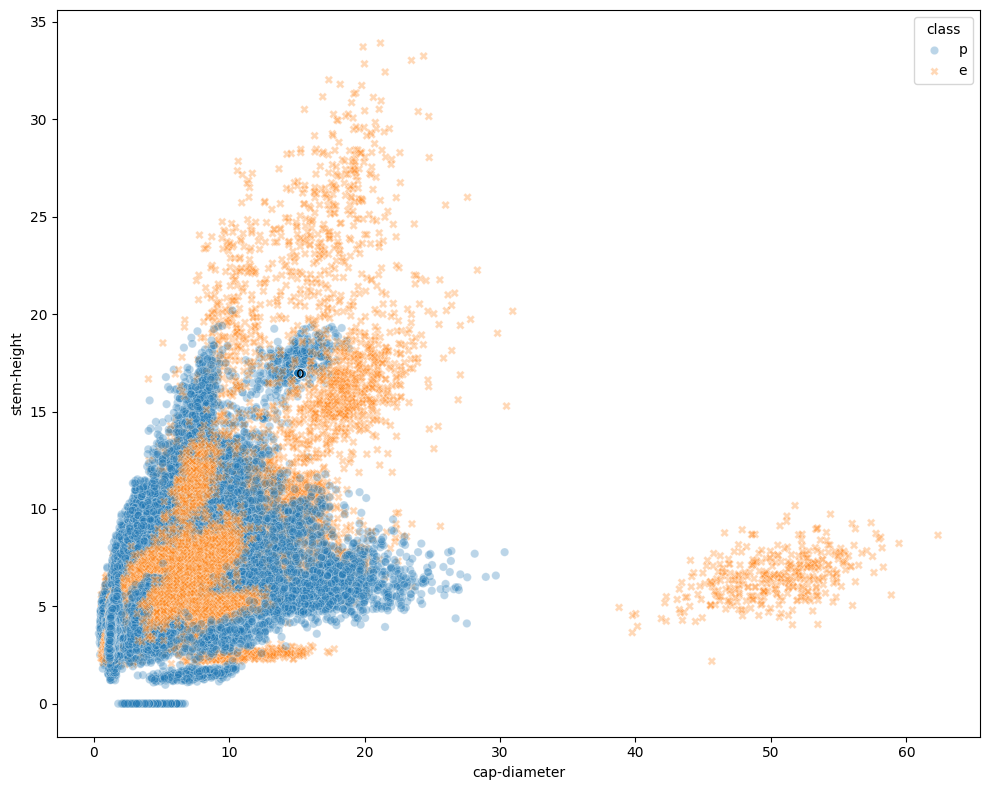

In [178]:
nbrs = knn.kneighbors(new_record)
maxDistance = np.max(nbrs[0][0])

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x = 'cap-diameter', y = 'stem-height', style = 'class', 
                hue='class', data=frame, alpha=0.3, ax=ax)
sns.scatterplot(x = 'cap-diameter', y = 'stem-height', style = 'class', 
                hue = 'class', 
                data = pd.concat([frame.loc[0:0, :], frame.loc[nbrs[1][0] + 1,:]]), 
                ax = ax, legend=False)
ellipse = Ellipse(xy = new_record.values[0], 
                  width = 2 * maxDistance, height = 2 * maxDistance,
                  edgecolor = 'black', fc = 'None', lw = 1)
ax.add_patch(ellipse)

plt.tight_layout()
plt.show()

Число соседей (n_neighbors): В данном примере я выбрал n_neighbors = 5, что является распространенным выбором. 

Тренировочный и тестовый наборы (train_test_split): Я использую функцию train_test_split для разделения данных на тренировочный и тестовый наборы. Здесь я выбираю test_size=0.2, что означает, что 20% данных будет использовано для тестирования модели.

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print(f'Точность модели: {accuracy_score(y_test, y_pred)}')

Точность модели: 0.6569510397904045


**Метод k-ближайших соседей – это простой алгоритм машинного обучения с учителем, который можно использовать для решения задач классификации и регрессии. Он прост в реализации и понимании, но имеет существенный недостаток – значительное замедление работы, когда объем данных растет.**